In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv('../data/NASA Near-Earth Objects.csv', index_col=0)
df.index = range(1, len(df) + 1) 

df.head()

,id,neo_reference_id,name,name_limited,designation,absolute_magnitude_h,is_potentially_hazardous_asteroid,is_sentry_object,kilometers_estimated_diameter_min,kilometers_estimated_diameter_max,orbit_id,orbit_class_type,perihelion_distance,aphelion_distance,first_observation_date,last_observation_date,orbit_class_description
1,2001981,2001981,1981 Midas (1973 EA),Midas,1981,15.22,True,False,2.401900,5.370812,229,APO,0.621512,2.931360,1973-03-06,2021-10-20,Near-Earth asteroid orbits which cross the Ear...
2,2002059,2002059,2059 Baboquivari (1963 UA),Baboquivari,2059,15.97,False,False,1.700415,3.802244,268,AMO,1.238537,4.047945,1963-10-16,2021-04-15,Near-Earth asteroid orbits similar to that of ...
3,2002061,2002061,2061 Anza (1960 UA),Anza,2061,16.36,False,False,1.420872,3.177167,180,AMO,1.050403,3.478155,1960-10-22,2021-06-12,Near-Earth asteroid orbits similar to that of ...
4,2002062,2002062,2062 Aten (1976 AA),Aten,2062,17.10,False,False,1.010543,2.259644,149,ATE,0.790185,1.143633,1955-12-17,2019-11-10,Near-Earth asteroid orbits similar to that of ...
5,2002063,2002063,2063 Bacchus (1977 HB),Bacchus,2063,17.28,False,False,0.930154,2.079888,143,APO,0.701397,1.454804,1977-04-24,2021-12-02,Near-Earth asteroid orbits which cross the Ear...


In [3]:
df.drop(columns=['neo_reference_id', 'name_limited', 'orbit_id', 'name','designation' ], inplace=True)

In [4]:
df.isnull().sum()

id                                   0
absolute_magnitude_h                 8
is_potentially_hazardous_asteroid    0
is_sentry_object                     0
kilometers_estimated_diameter_min    8
kilometers_estimated_diameter_max    8
orbit_class_type                     0
perihelion_distance                  0
aphelion_distance                    0
first_observation_date               0
last_observation_date                0
orbit_class_description              0
dtype: int64

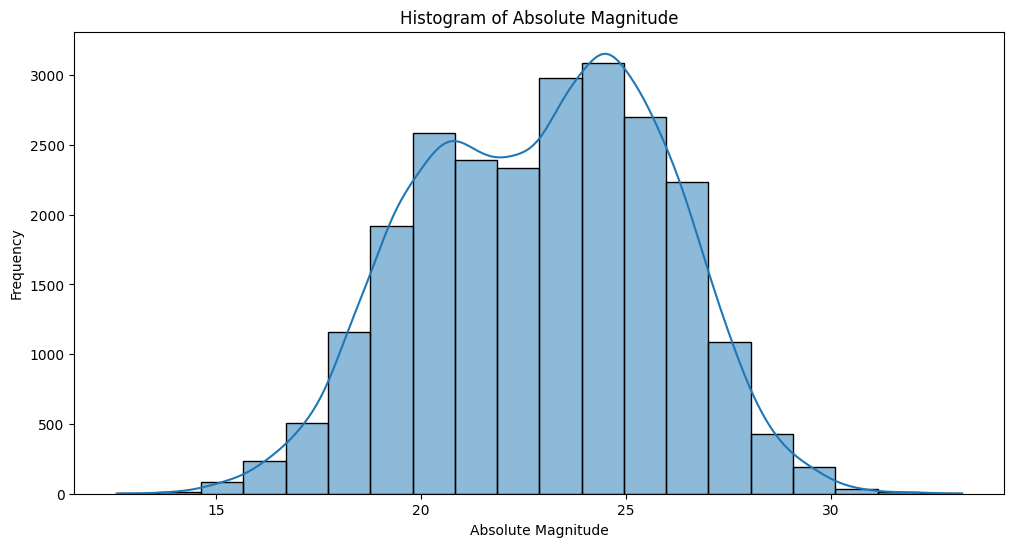

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.histplot(df['absolute_magnitude_h'], bins=20, edgecolor='black', kde = True)
plt.title('Histogram of Absolute Magnitude')
plt.xlabel('Absolute Magnitude')
plt.ylabel('Frequency')
plt.show()


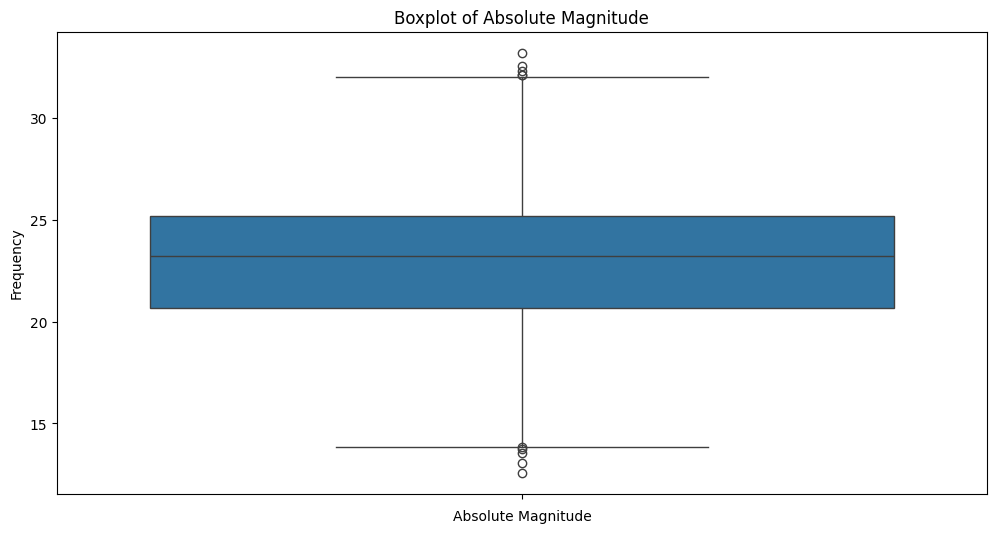

In [6]:
plt.figure(figsize=(12,6))
sns.boxplot(df['absolute_magnitude_h'])
plt.title('Boxplot of Absolute Magnitude')
plt.xlabel('Absolute Magnitude')
plt.ylabel('Frequency')
plt.show()



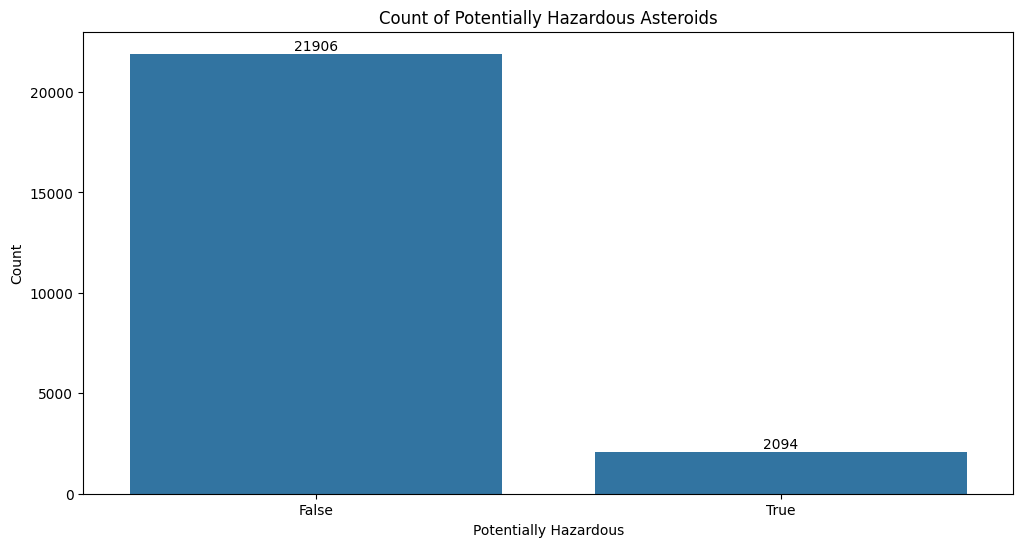

In [7]:
plt.figure(figsize=(12,6))
sns.countplot(x='is_potentially_hazardous_asteroid', data=df)
plt.title('Count of Potentially Hazardous Asteroids')
plt.xlabel('Potentially Hazardous')
plt.ylabel('Count')
plt.gca().bar_label(plt.gca().containers[0])

plt.show()

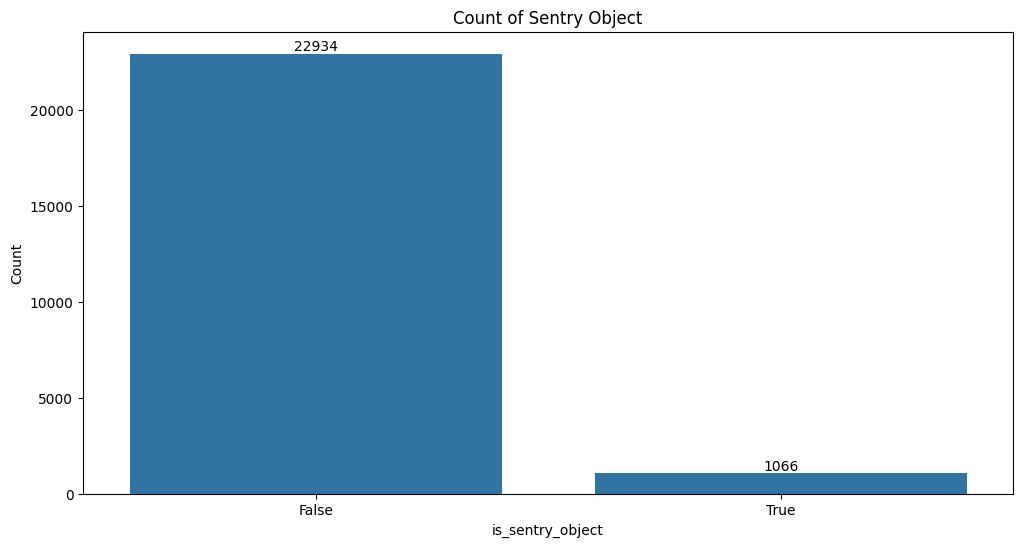

In [8]:
plt.figure(figsize=(12,6))
sns.countplot(x='is_sentry_object', data=df)
plt.title('Count of Sentry Object')
plt.ylabel('Count')
plt.gca().bar_label(plt.gca().containers[0])
plt.show()

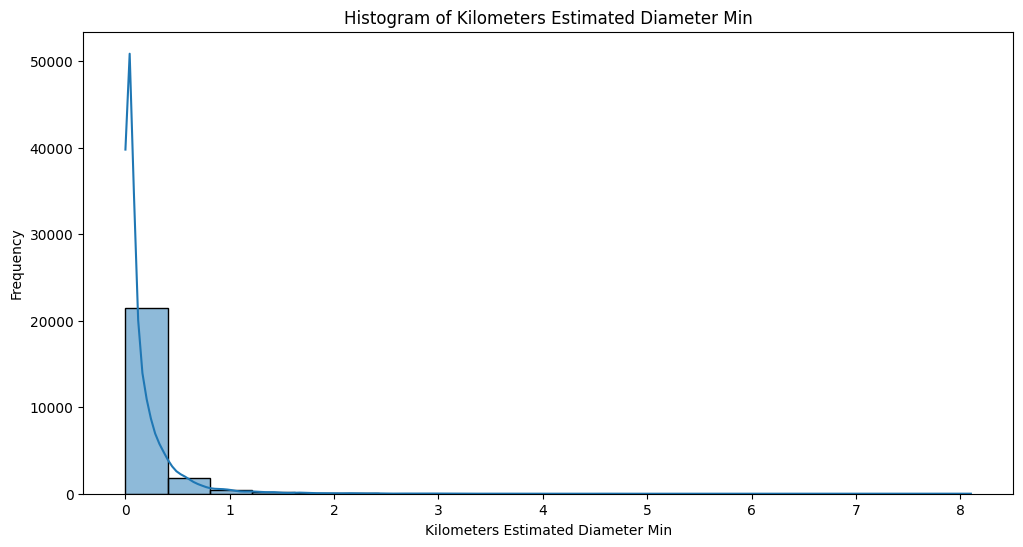

In [9]:
plt.figure(figsize=(12,6))
sns.histplot(df['kilometers_estimated_diameter_min'], bins=20, edgecolor='black', kde = True)
plt.title('Histogram of Kilometers Estimated Diameter Min')
plt.xlabel('Kilometers Estimated Diameter Min')
plt.ylabel('Frequency')
plt.show()


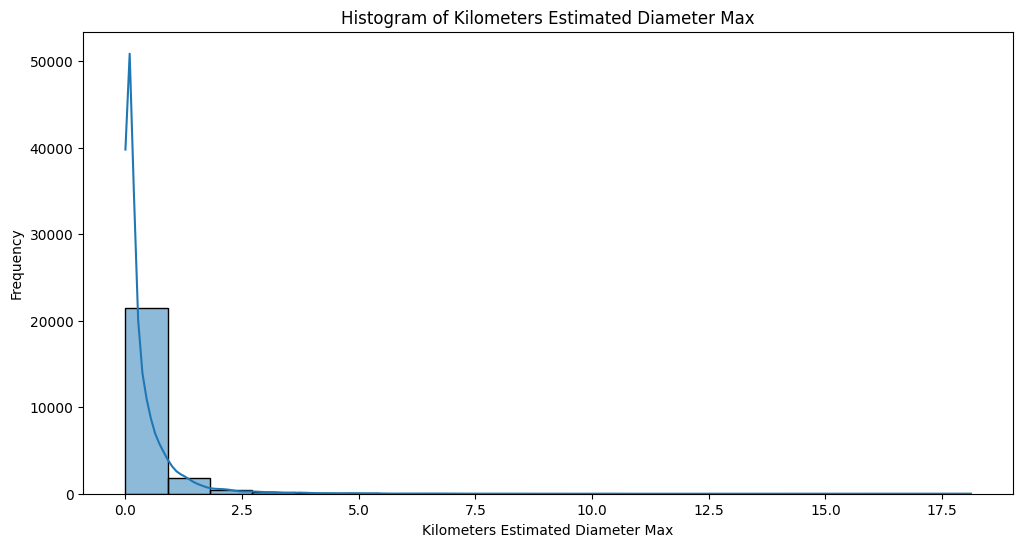

In [10]:
plt.figure(figsize=(12,6))
sns.histplot(df['kilometers_estimated_diameter_max'], bins=20, edgecolor='black', kde = True)
plt.title('Histogram of Kilometers Estimated Diameter Max')
plt.xlabel('Kilometers Estimated Diameter Max')
plt.ylabel('Frequency')
plt.show()

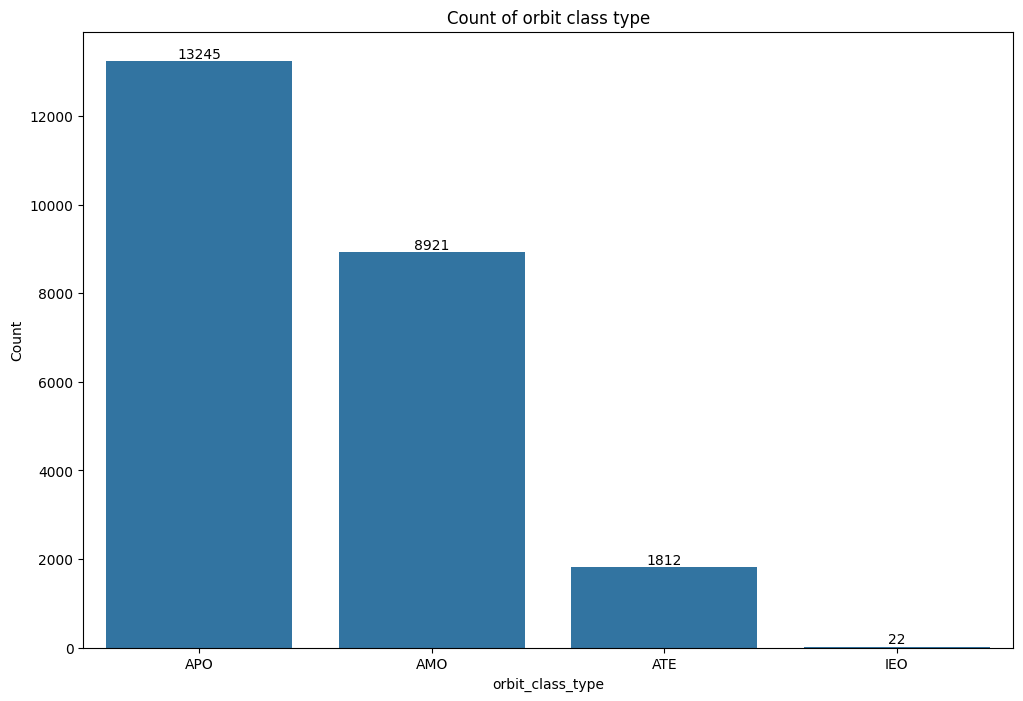

In [11]:
plt.figure(figsize=(12,8))
sns.countplot(x='orbit_class_type', data=df)
plt.title('Count of orbit class type')
plt.ylabel('Count')
plt.gca().bar_label(plt.gca().containers[0])
plt.show()

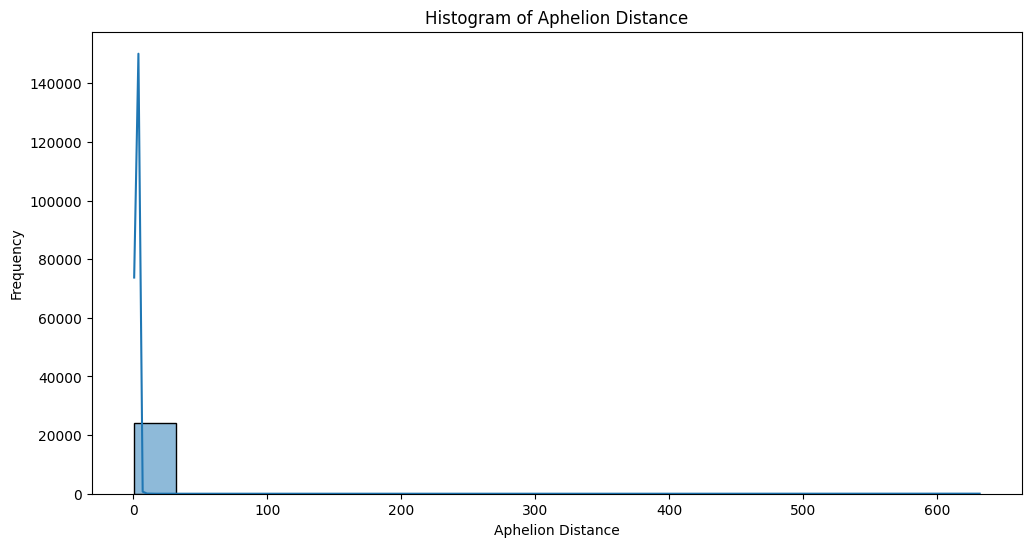

In [12]:
plt.figure(figsize=(12, 6))
sns.histplot(df['aphelion_distance'], bins=20, edgecolor='black', kde = True)
plt.title('Histogram of Aphelion Distance')
plt.xlabel('Aphelion Distance')
plt.ylabel('Frequency')
plt.show()

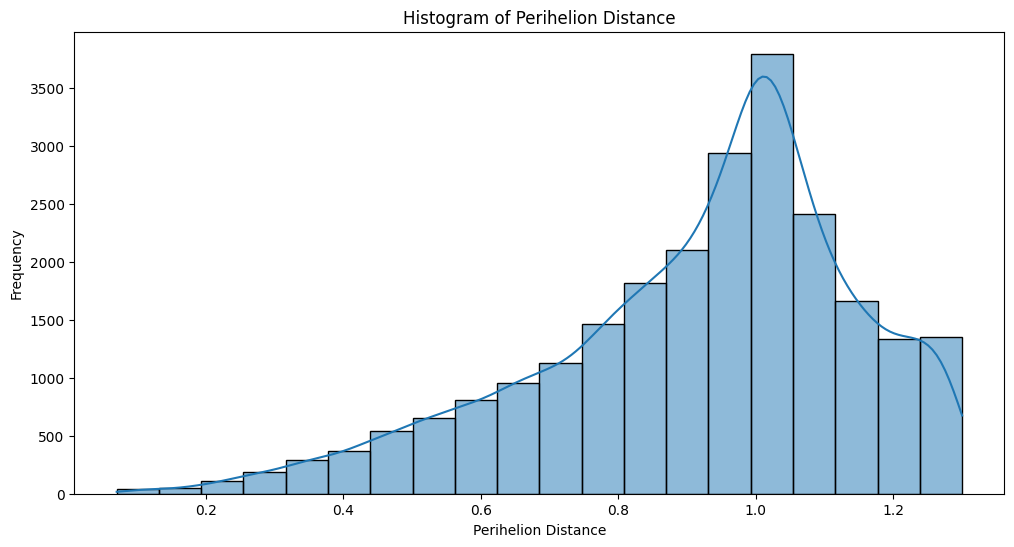

In [13]:
plt.figure(figsize=(12, 6))
sns.histplot(df['perihelion_distance'], bins=20, edgecolor='black', kde = True)
plt.title('Histogram of Perihelion Distance')
plt.xlabel('Perihelion Distance')
plt.ylabel('Frequency')
plt.show()

# Biểu đồ liên quan giữa các cột

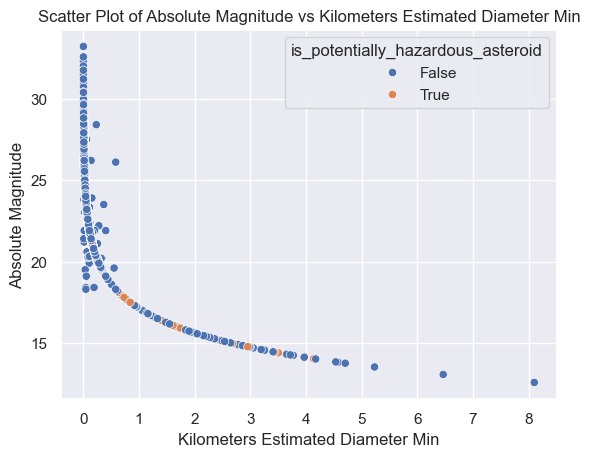

In [14]:
import seaborn as sns; sns.set_theme(color_codes = True)
sns.scatterplot(x='kilometers_estimated_diameter_min', y='absolute_magnitude_h', data=df, hue='is_potentially_hazardous_asteroid')
plt.title('Scatter Plot of Absolute Magnitude vs Kilometers Estimated Diameter Min')
plt.ylabel('Absolute Magnitude')
plt.xlabel('Kilometers Estimated Diameter Min')
plt.show()


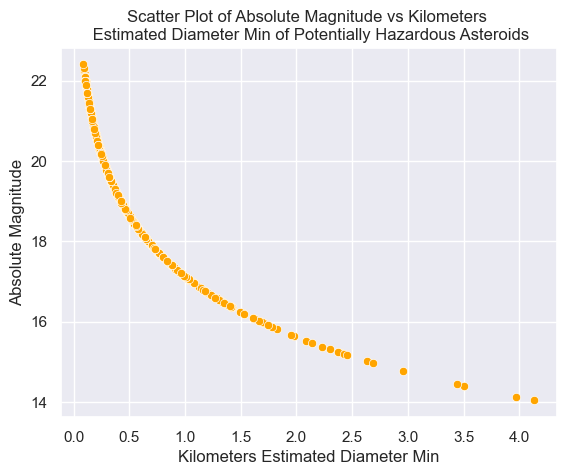

In [15]:
import seaborn as sns; sns.set_theme(color_codes = True)
is_true = df[df['is_potentially_hazardous_asteroid'] == True]
sns.scatterplot(x='kilometers_estimated_diameter_min', y='absolute_magnitude_h', data=is_true, color='orange')
plt.title('Scatter Plot of Absolute Magnitude vs Kilometers \n Estimated Diameter Min of Potentially Hazardous Asteroids')
plt.ylabel('Absolute Magnitude')
plt.xlabel('Kilometers Estimated Diameter Min')
plt.show()

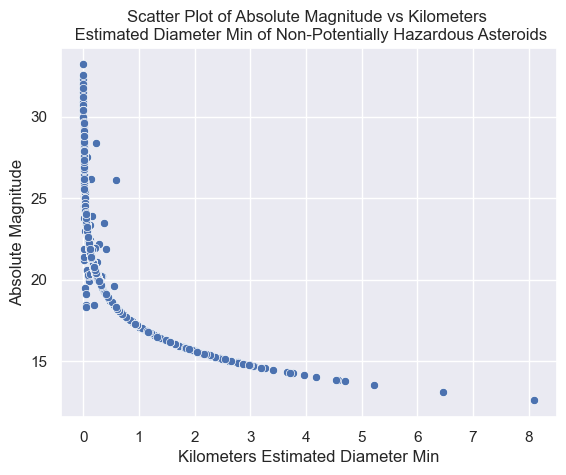

In [16]:
import seaborn as sns; sns.set_theme(color_codes = True)
is_false = df[df['is_potentially_hazardous_asteroid'] == False]
sns.scatterplot(x='kilometers_estimated_diameter_min', y='absolute_magnitude_h', data=is_false)
plt.title('Scatter Plot of Absolute Magnitude vs Kilometers \n Estimated Diameter Min of Non-Potentially Hazardous Asteroids')
plt.ylabel('Absolute Magnitude')
plt.xlabel('Kilometers Estimated Diameter Min')
plt.show()

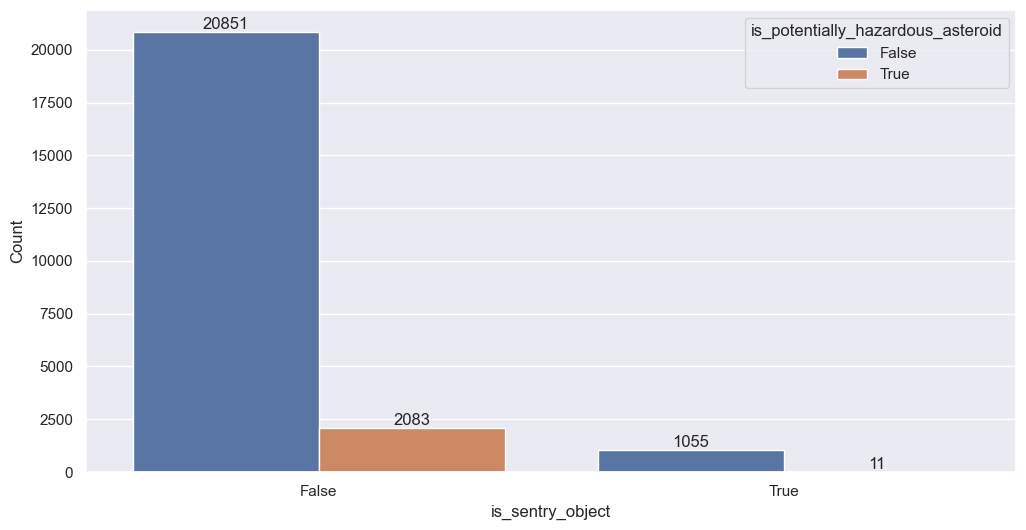

In [43]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='is_sentry_object',
             hue='is_potentially_hazardous_asteroid')
# plt.title('Distribution of absolute_magnitude_h without outliers')
plt.xlabel('is_sentry_object')
plt.ylabel('Count')
plt.gca().bar_label(plt.gca().containers[0])
plt.gca().bar_label(plt.gca().containers[1])
plt.show()

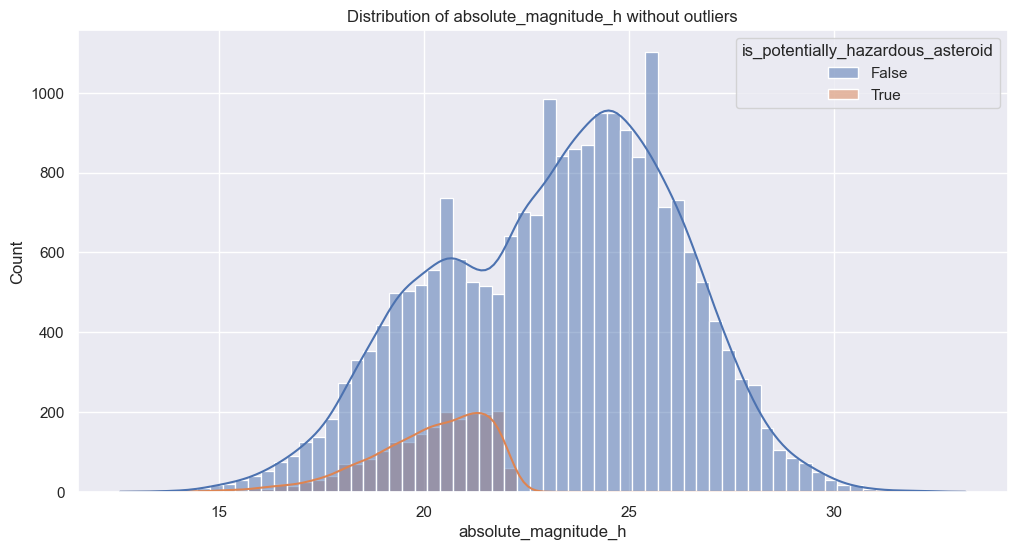

In [40]:
plt.figure(figsize=(12,6))
sns.histplot(data=df, x='absolute_magnitude_h',
             hue='is_potentially_hazardous_asteroid', kde=True)
plt.title('Distribution of absolute_magnitude_h without outliers')
plt.xlabel('absolute_magnitude_h')
plt.ylabel('Count')
plt.show()

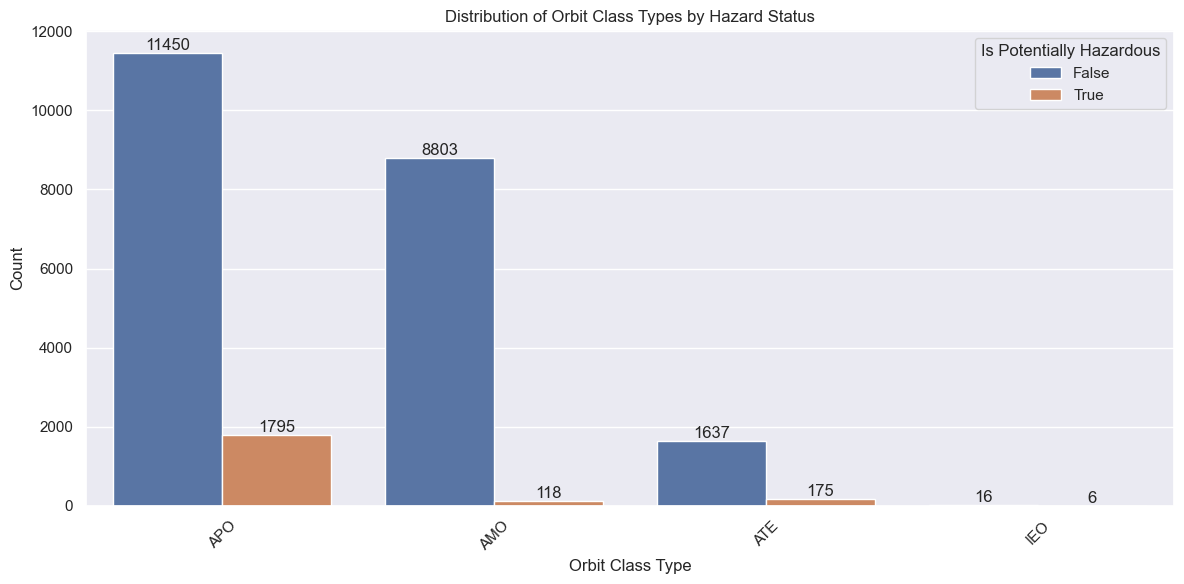

In [19]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='orbit_class_type', hue='is_potentially_hazardous_asteroid')
plt.title('Distribution of Orbit Class Types by Hazard Status')
plt.xlabel('Orbit Class Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Is Potentially Hazardous')
plt.gca().bar_label(plt.gca().containers[0])
plt.gca().bar_label(plt.gca().containers[1])
plt.tight_layout()
plt.show()

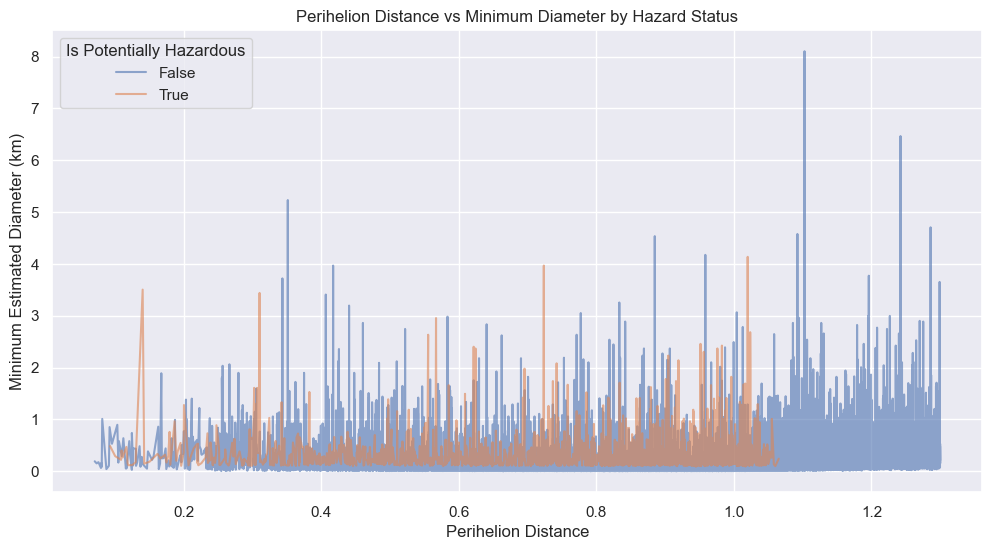

In [20]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df, x='perihelion_distance', y='kilometers_estimated_diameter_min', 
                hue='is_potentially_hazardous_asteroid', alpha=0.6)
plt.title('Perihelion Distance vs Minimum Diameter by Hazard Status')
plt.xlabel('Perihelion Distance')
plt.ylabel('Minimum Estimated Diameter (km)')
plt.legend(title='Is Potentially Hazardous')
plt.show()

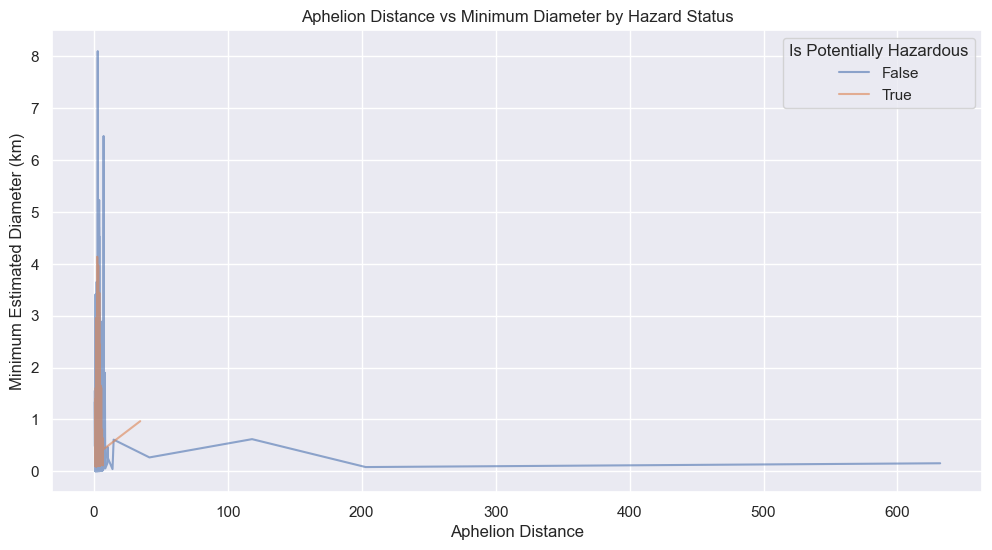

In [21]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df, x='aphelion_distance', y='kilometers_estimated_diameter_min', 
                hue='is_potentially_hazardous_asteroid', alpha=0.6)
plt.title('Aphelion Distance vs Minimum Diameter by Hazard Status')
plt.xlabel('Aphelion Distance')
plt.ylabel('Minimum Estimated Diameter (km)')
plt.legend(title='Is Potentially Hazardous')
plt.show()